<a href="https://colab.research.google.com/github/luisrondon2111/improved-system/blob/master/EDA%20Portfolio%20(Cleaning/Charts).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Original Data Shape: (891, 15)
------------------------------------------------
Missing Values after cleaning:
2
------------------------------------------------


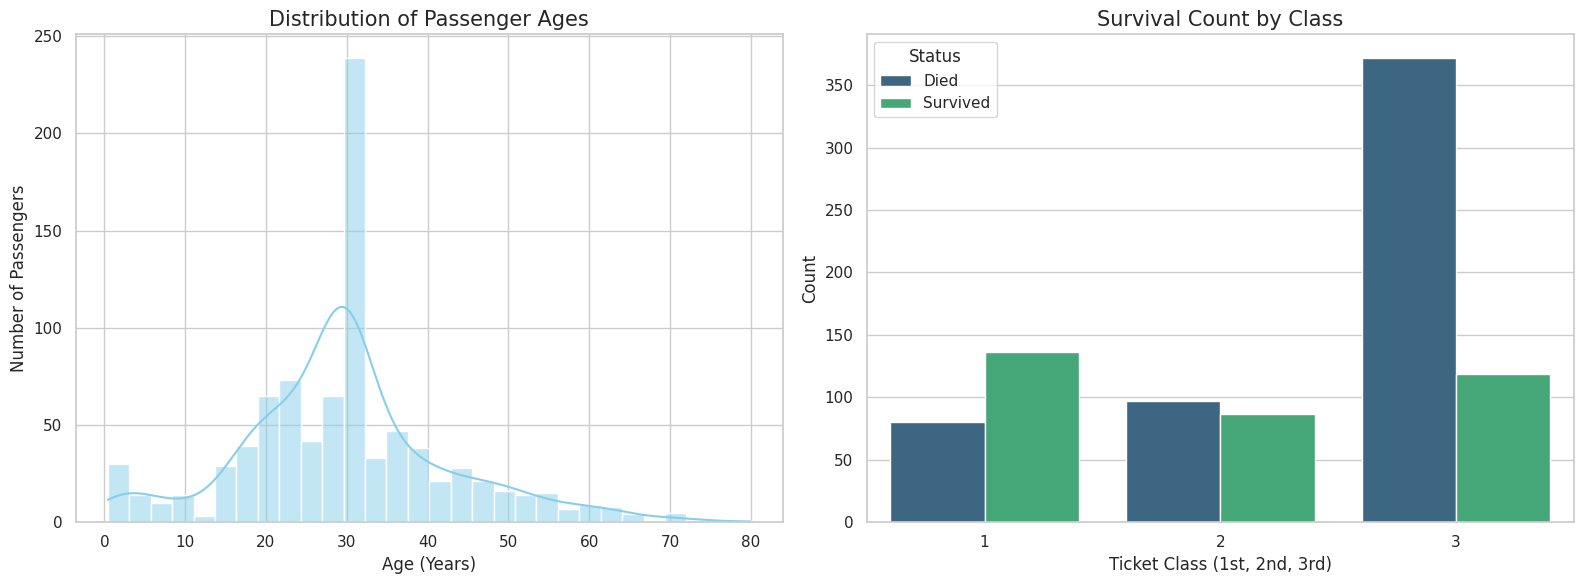

In [1]:
# --- STEP 1: LIBRARIES & SETUP ---
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Set the visual style for professional charts
sns.set(style="whitegrid")

# --- STEP 2: LOAD DATA ---
# We load the classic Titanic dataset directly from Seaborn
df = sns.load_dataset('titanic')

print(f"Original Data Shape: {df.shape}")
print("------------------------------------------------")

# --- STEP 3: DATA CLEANING ---

# 1. Fill missing Age values
# Strategy: Use the average age of all passengers
average_age = df['age'].mean()
df['age'] = df['age'].fillna(average_age)

# 2. Fill missing Embarked values
# Strategy: Use the most common value (Mode)
most_common_port = df['embarked'].mode()[0]
df['embarked'] = df['embarked'].fillna(most_common_port)

# 3. Drop rows that have too much missing info (like 'deck' which is mostly empty)
df = df.drop('deck', axis=1)

# Verify cleaning
print("Missing Values after cleaning:")
print(df.isnull().sum().sum())  # Should be 0 (or very close to 0)
print("------------------------------------------------")

# --- STEP 4: VISUALIZATION ---
# Create a figure with 2 charts side-by-side
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Chart 1: Distribution of Ages
sns.histplot(data=df, x='age', kde=True, color='skyblue', ax=axes[0])
axes[0].set_title('Distribution of Passenger Ages', fontsize=15)
axes[0].set_xlabel('Age (Years)')
axes[0].set_ylabel('Number of Passengers')

# Chart 2: Survival Rate by Class
# hue='survived' splits the bars into Died (0) vs Survived (1)
sns.countplot(data=df, x='pclass', hue='survived', palette='viridis', ax=axes[1])
axes[1].set_title('Survival Count by Class', fontsize=15)
axes[1].set_xlabel('Ticket Class (1st, 2nd, 3rd)')
axes[1].set_ylabel('Count')
axes[1].legend(title='Status', labels=['Died', 'Survived'])

# Show the final portfolio piece
plt.tight_layout()
plt.show()